In [1]:

import numpy as np
from sde import *


# #Range of the 5 parameters of the BPL model of the pulse counts distribution
# range_alpha_bpl = {"low": 1.+epsilon,                  "high": 2.-epsilon}
# range_beta_bpl  = {"low": 2.+epsilon,                  "high": 3.} 
# range_F_break   = {"low": np.log10(1.e-7*(1+epsilon)), "high": np.log10(1.e-5)}             # sample `F_break` uniformly in log space
# range_F_min     = {"low": np.log10(1.e-8),             "high": np.log10(1.e-7*(1-epsilon))} # sample `F_min`   uniformly in log space




In [2]:
ndis=1000
peak_cts=[]
alpha_bpl = 1.5
beta_bpl = 2.5
F_break = 1e-6
F_min = 1e-8
for i in range(ndis):
    lc=LC(q=0.1,a=0.05,alpha=2, k=1, t_0=0.2,t_min=+0.1, t_max=1000, res=0.256, 
                    eff_area=3600, bg_level=10.67, with_bg=True, use_poisson=True,
                    min_photon_rate=1.3, max_photon_rate=1300, sigma=5, 
                    n_cut=None, instrument='batse', verbose=False,alpha_bpl=alpha_bpl, beta_bpl=beta_bpl, F_break=F_break, F_min=F_min)#New parameters of the BPL count distrib
    lc.generate_LC_from_sde(q=0.1,a=0.05,alpha=2,k=1,t_0=0.2,alpha_bpl=alpha_bpl,beta_bpl=beta_bpl,F_break=F_break,F_min=F_min)
    peak_cts.append(lc._norm_A)

12.345384010276577 67763.2523249587


Text(0, 0.5, '#')

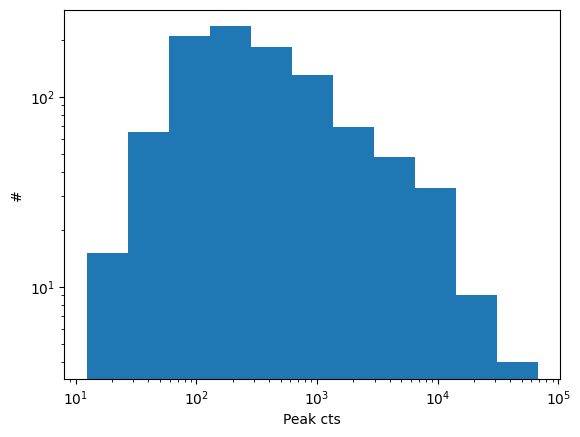

In [3]:
print(np.min(peak_cts),np.max(peak_cts))
#plt.figure(figsize=(12,8))
plt.hist(peak_cts,bins=np.logspace(np.log10(np.min(peak_cts)),np.log10(np.max(peak_cts)),12))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Peak cts')
plt.ylabel('#')
